In [1]:
import cv2

In [2]:
test_image="0.jfif"

In [3]:
test_image=cv2.imread(test_image)

In [4]:
#Extracting height and width
h,w=test_image.shape[:2]
print(h,w)

1250 1000


In [7]:
#extracting rgn from randomly chosem pixel by passing 100 height and 100 width
(B,G,R)=test_image[100,100]

In [8]:
#calculate region of interest by slicimg
roi=test_image[100:500,200:700]

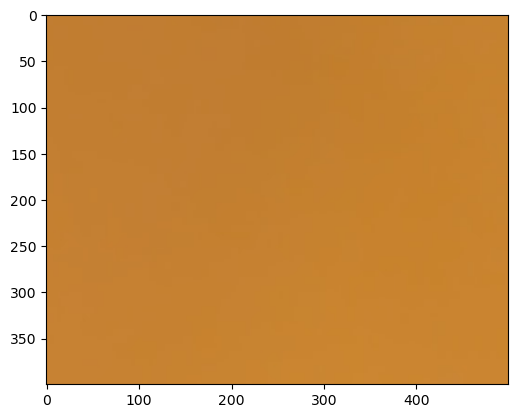

In [17]:
import matplotlib.pyplot as plt
plt.imshow(roi)

In [ ]:
center=(w//2,h//2)
matrix=()